### Data loading and Preprocessing

In [1]:
#importing all necessary libraries
import math
import numpy as np
import scipy as sp  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import StratifiedKFold
import pprint 
import warnings
from numpy.linalg import inv
from scipy.linalg import eigh
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import silhouette_score
warnings.filterwarnings('ignore')

In [2]:
#loading the file into pandas dataframe
def load_data(file_path):
    return pd.read_csv(file_path)

file_path = "DMT Dataset/wdbc.data"
data = load_data(file_path)


In [3]:
#Normalizing the values of all the columns except target and primary key
#to make sure that the attribute values are between 0 and 1 so that it'll
#be easier for the model to train
attr = ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 
        'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 
        'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 
        'concave_points3', 'symmetry3', 'fractal_dimension3']

for i in attr:
    column_name = i
    column_data = data[column_name]
    min_val = column_data.min()
    max_val = column_data.max()
    normalized_column_data = (column_data - min_val) / (max_val - min_val)
    data[column_name] = normalized_column_data

print(data.head())


         ID Diagnosis   radius1  texture1  perimeter1     area1  smoothness1  \
0    842302         M  0.521037  0.022658    0.545989  0.363733     0.593753   
1    842517         M  0.643144  0.272574    0.615783  0.501591     0.289880   
2  84300903         M  0.601496  0.390260    0.595743  0.449417     0.514309   
3  84348301         M  0.210090  0.360839    0.233501  0.102906     0.811321   
4  84358402         M  0.629893  0.156578    0.630986  0.489290     0.430351   

   compactness1  concavity1  concave_points1  ...   radius3  texture3  \
0      0.792037    0.703140         0.731113  ...  0.620776  0.141525   
1      0.181768    0.203608         0.348757  ...  0.606901  0.303571   
2      0.431017    0.462512         0.635686  ...  0.556386  0.360075   
3      0.811361    0.565604         0.522863  ...  0.248310  0.385928   
4      0.347893    0.463918         0.518390  ...  0.519744  0.123934   

   perimeter3     area3  smoothness3  compactness3  concavity3  \
0    0.668310 

In [4]:
#Converting the categorical values into integers
mapping = {'B': 0, 'M': 1}
data['Diagnosis'] = data['Diagnosis'].map(mapping)

print(data.head())

         ID  Diagnosis   radius1  texture1  perimeter1     area1  smoothness1  \
0    842302          1  0.521037  0.022658    0.545989  0.363733     0.593753   
1    842517          1  0.643144  0.272574    0.615783  0.501591     0.289880   
2  84300903          1  0.601496  0.390260    0.595743  0.449417     0.514309   
3  84348301          1  0.210090  0.360839    0.233501  0.102906     0.811321   
4  84358402          1  0.629893  0.156578    0.630986  0.489290     0.430351   

   compactness1  concavity1  concave_points1  ...   radius3  texture3  \
0      0.792037    0.703140         0.731113  ...  0.620776  0.141525   
1      0.181768    0.203608         0.348757  ...  0.606901  0.303571   
2      0.431017    0.462512         0.635686  ...  0.556386  0.360075   
3      0.811361    0.565604         0.522863  ...  0.248310  0.385928   
4      0.347893    0.463918         0.518390  ...  0.519744  0.123934   

   perimeter3     area3  smoothness3  compactness3  concavity3  \
0    0.6

In [5]:
data.head()

ID  Diagnosis   radius1  texture1  perimeter1     area1  smoothness1  \
0    842302          1  0.521037  0.022658    0.545989  0.363733     0.593753   
1    842517          1  0.643144  0.272574    0.615783  0.501591     0.289880   
2  84300903          1  0.601496  0.390260    0.595743  0.449417     0.514309   
3  84348301          1  0.210090  0.360839    0.233501  0.102906     0.811321   
4  84358402          1  0.629893  0.156578    0.630986  0.489290     0.430351   

   compactness1  concavity1  concave_points1  ...   radius3  texture3  \
0      0.792037    0.703140         0.731113  ...  0.620776  0.141525   
1      0.181768    0.203608         0.348757  ...  0.606901  0.303571   
2      0.431017    0.462512         0.635686  ...  0.556386  0.360075   
3      0.811361    0.565604         0.522863  ...  0.248310  0.385928   
4      0.347893    0.463918         0.518390  ...  0.519744  0.123934   

   perimeter3     area3  smoothness3  compactness3  concavity3  \
0    0.668310  0.450698     0.601136      0.619292    0.568610   
1    0.539818  0.435214     0.347553      0.154563    0.192971   
2    0.508442  0.374508     0.483590      0.385375    0.359744   
3    0.241347  0.094008     0.915472      0.814012    0.548642   
4    0.506948  0.341575     0.437364      0.172415    0.319489   

   concave_points3  symmetry3  fractal_dimension3  
0         0.912027   0.598462            0.418864  
1         0.639175   0.233590            0.222878  
2         0.835052   0.403706            0.213433  
3         0.884880   1.000000            0.773711  
4         0.558419   0.157500            0.142595  

[5 rows x 32 columns]

In [6]:
#dropping the ID column as this has no significance in classifying the attribute values
data.drop('ID', axis=1, inplace=True)

In [7]:
data.head()

Diagnosis   radius1  texture1  perimeter1     area1  smoothness1  \
0          1  0.521037  0.022658    0.545989  0.363733     0.593753   
1          1  0.643144  0.272574    0.615783  0.501591     0.289880   
2          1  0.601496  0.390260    0.595743  0.449417     0.514309   
3          1  0.210090  0.360839    0.233501  0.102906     0.811321   
4          1  0.629893  0.156578    0.630986  0.489290     0.430351   

   compactness1  concavity1  concave_points1  symmetry1  ...   radius3  \
0      0.792037    0.703140         0.731113   0.686364  ...  0.620776   
1      0.181768    0.203608         0.348757   0.379798  ...  0.606901   
2      0.431017    0.462512         0.635686   0.509596  ...  0.556386   
3      0.811361    0.565604         0.522863   0.776263  ...  0.248310   
4      0.347893    0.463918         0.518390   0.378283  ...  0.519744   

   texture3  perimeter3     area3  smoothness3  compactness3  concavity3  \
0  0.141525    0.668310  0.450698     0.601136      0.619292    0.568610   
1  0.303571    0.539818  0.435214     0.347553      0.154563    0.192971   
2  0.360075    0.508442  0.374508     0.483590      0.385375    0.359744   
3  0.385928    0.241347  0.094008     0.915472      0.814012    0.548642   
4  0.123934    0.506948  0.341575     0.437364      0.172415    0.319489   

   concave_points3  symmetry3  fractal_dimension3  
0         0.912027   0.598462            0.418864  
1         0.639175   0.233590            0.222878  
2         0.835052   0.403706            0.213433  
3         0.884880   1.000000            0.773711  
4         0.558419   0.157500            0.142595  

[5 rows x 31 columns]

In [8]:
#Taking a look at the data trends and statistics for each attribute
data.describe().T

count      mean       std  min       25%       50%  \
Diagnosis           569.0  0.372583  0.483918  0.0  0.000000  0.000000   
radius1             569.0  0.338222  0.166787  0.0  0.223342  0.302381   
texture1            569.0  0.323965  0.145453  0.0  0.218465  0.308759   
perimeter1          569.0  0.332935  0.167915  0.0  0.216847  0.293345   
area1               569.0  0.216920  0.149274  0.0  0.117413  0.172895   
smoothness1         569.0  0.394785  0.126967  0.0  0.304595  0.390358   
compactness1        569.0  0.260601  0.161992  0.0  0.139685  0.224679   
concavity1          569.0  0.208058  0.186785  0.0  0.069260  0.144189   
concave_points1     569.0  0.243137  0.192857  0.0  0.100944  0.166501   
symmetry1           569.0  0.379605  0.138456  0.0  0.282323  0.369697   
fractal_dimension1  569.0  0.270379  0.148702  0.0  0.163016  0.243892   
radius2             569.0  0.106345  0.100421  0.0  0.043781  0.077023   
texture2            569.0  0.189324  0.121917  0.0  0.104690  0.165267   
perimeter2          569.0  0.099376  0.095267  0.0  0.040004  0.072092   
area2               569.0  0.062636  0.084967  0.0  0.020635  0.033112   
smoothness2         569.0  0.181119  0.102067  0.0  0.117483  0.158650   
compactness2        569.0  0.174439  0.134498  0.0  0.081323  0.136675   
concavity2          569.0  0.080540  0.076227  0.0  0.038106  0.065379   
concave_points2     569.0  0.223454  0.116884  0.0  0.144686  0.207047   
symmetry2           569.0  0.178143  0.116316  0.0  0.102409  0.152643   
fractal_dimension2  569.0  0.100193  0.091417  0.0  0.046750  0.079191   
radius3             569.0  0.296663  0.171940  0.0  0.180719  0.250445   
texture3            569.0  0.363998  0.163813  0.0  0.241471  0.356876   
perimeter3          569.0  0.283138  0.167352  0.0  0.167837  0.235320   
area3               569.0  0.170906  0.139932  0.0  0.081130  0.123206   
smoothness3         569.0  0.404138  0.150779  0.0  0.300007  0.397081   
compactness3        569.0  0.220212  0.152649  0.0  0.116337  0.179110   
concavity3          569.0  0.217403  0.166633  0.0  0.091454  0.181070   
concave_points3     569.0  0.393836  0.225884  0.0  0.223127  0.343402   
symmetry3           569.0  0.263307  0.121954  0.0  0.185098  0.247782   
fractal_dimension3  569.0  0.189596  0.118466  0.0  0.107700  0.163977   

                         75%  max  
Diagnosis           1.000000  1.0  
radius1             0.416442  1.0  
texture1            0.408860  1.0  
perimeter1          0.416765  1.0  
area1               0.271135  1.0  
smoothness1         0.475490  1.0  
compactness1        0.340531  1.0  
concavity1          0.306232  1.0  
concave_points1     0.367793  1.0  
symmetry1           0.453030  1.0  
fractal_dimension1  0.340354  1.0  
radius2             0.133044  1.0  
texture2            0.246155  1.0  
perimeter2          0.122509  1.0  
area2               0.071700  1.0  
smoothness2         0.218683  1.0  
compactness2        0.226800  1.0  
concavity2          0.106187  1.0  
concave_points2     0.278651  1.0  
symmetry2           0.219480  1.0  
fractal_dimension2  0.126556  1.0  
radius3             0.386339  1.0  
texture3            0.471748  1.0  
perimeter3          0.373475  1.0  
area3               0.220901  1.0  
smoothness3         0.494156  1.0  
compactness3        0.302520  1.0  
concavity3          0.305831  1.0  
concave_points3     0.554639  1.0  
symmetry3           0.318155  1.0  
fractal_dimension3  0.242949  1.0

In [9]:
#Fetching correlation data amongst the attributes
#We mainly need to focus on the target attribute correlation with rest of the columns
correlation_data = data.corr()
cor_target = abs(correlation_data["Diagnosis"])
relevant_features = cor_target[cor_target>0.05]
names = [iter for iter, value in relevant_features.items()]

print(names)

['Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'radius2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']


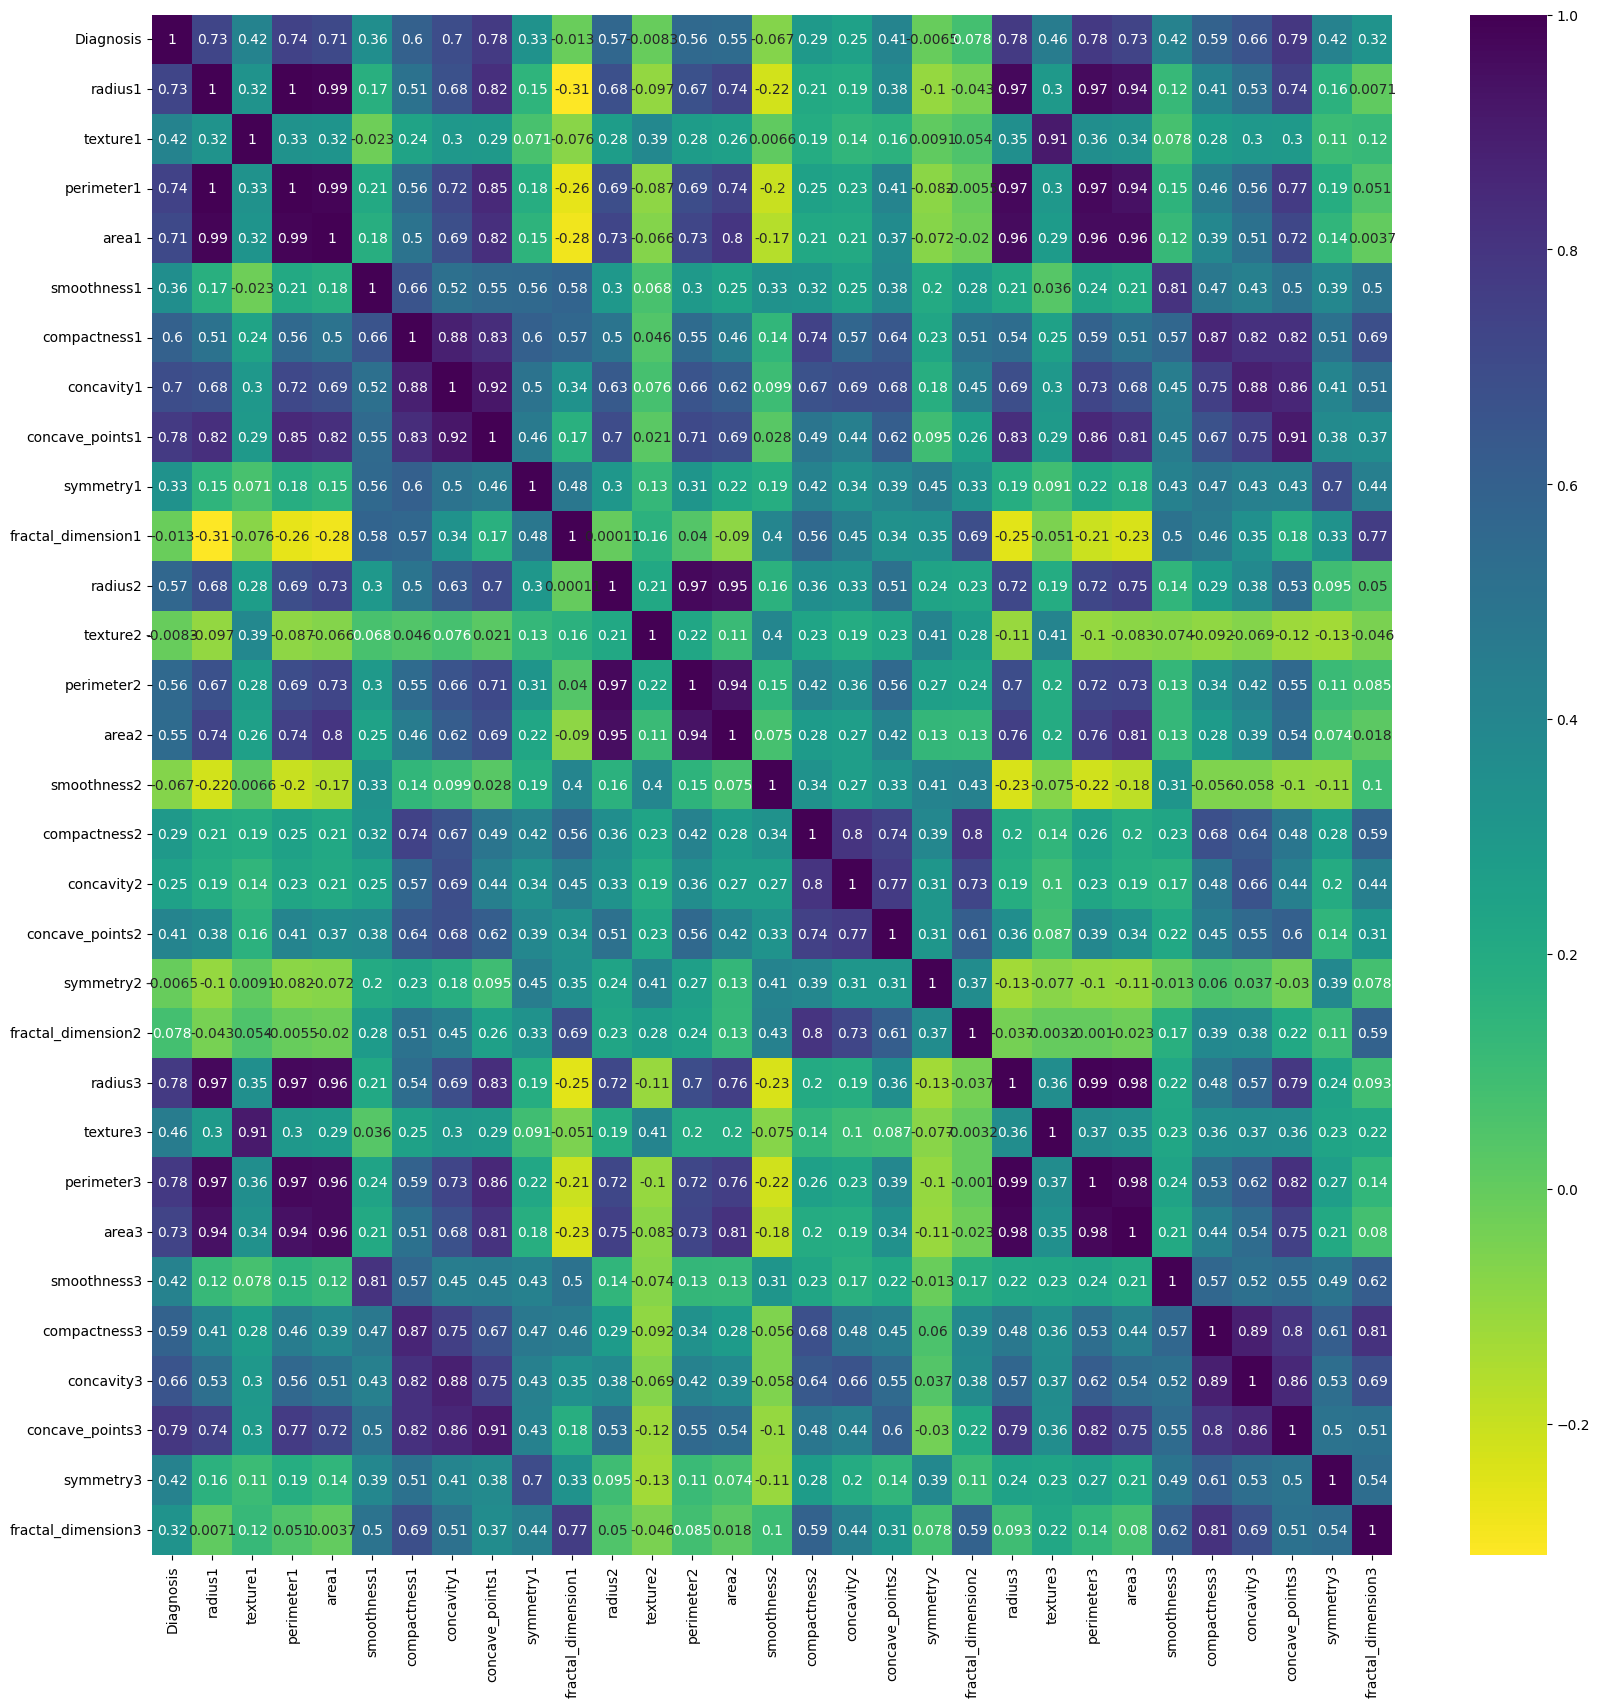

In [10]:
#Plotting the correlation matrix 
plt.figure(figsize=(20,20))
sns.heatmap(correlation_data, cmap='viridis_r',annot=True)
plt.show()

### K-means Clustering Implementation

In [11]:
import numpy as np
import random

class KMeans:
    def __init__(self, k, max_iteration=100, tolerance=1e-4, initialization='random'):
        """
        Initializing the KMeans object. We have 4 main arguments which are k that is the number of clusters, max_iteration is 
        the number of iterations that the algorithm performs to find the clusters, tolerance which is the value that we check 
        for convergence of the cluster. The last argument is seeing if we take randomly choose the centroids or we use kmeans++ 
        algorithm to find the centroids.

        The class has a five variables out of which four are just the arguments that the class takes and one is the final array 
        of centroids that has labels and actual centroid values.
        """
        self.k = k
        self.max_iteration = max_iteration
        self.tolerance = tolerance
        self.initialization = initialization
        self.centroids = None
        
    def fit(self, X):
        """
        We give the dataset as input without the target column and it returns arrays containing the centroids of the clusters and 
        the labels for each datapoint that indicates to which cluster it belongs to.
        """
        rows, columns = X.shape
        centroids = np.zeros((self.k, columns))
        if self.initialization == 'random':
            # Select k random data points as initial centroids
            ind = random.sample(range(rows), self.k)
            centroids = X[ind]

        elif self.initialization == 'k-means++':
            # Initialize first centroid randomly
            centroids[0] = X[np.random.randint(rows)]
            for i in range(1, self.k):
                # Calculate squared distances from each point to nearest centroid
                distances = np.min([np.linalg.norm(X - centroid, axis=1) for centroid in centroids[:i]], axis=0)
                probabilities = distances / np.sum(distances)
                cum_probability = np.cumsum(probabilities)
                r = np.random.rand()
                # Choose next centroid based on probability
                for j, p in enumerate(cum_probability):
                    if r < p:
                        centroids[i] = X[j]
                        break
        self.centroids = centroids
        for _ in range(self.max_iteration):
            # Calculate distances from each point to each centroid
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            # Assign each point to nearest centroid
            labels = np.argmin(distances, axis=1)
            columns = X.shape[1]
            centroids = np.zeros((self.k, columns))
            # Update centroids based on mean of points assigned to each cluster
            for i in range(self.k):
                points = X[labels == i]
                if points.size:
                    centroids[i] = points.mean(axis=0)
            new_centroids = centroids
            # Check for convergence
            if np.all(np.abs(new_centroids - self.centroids) < self.tolerance):
                break
            self.centroids = new_centroids
        return self.centroids, labels


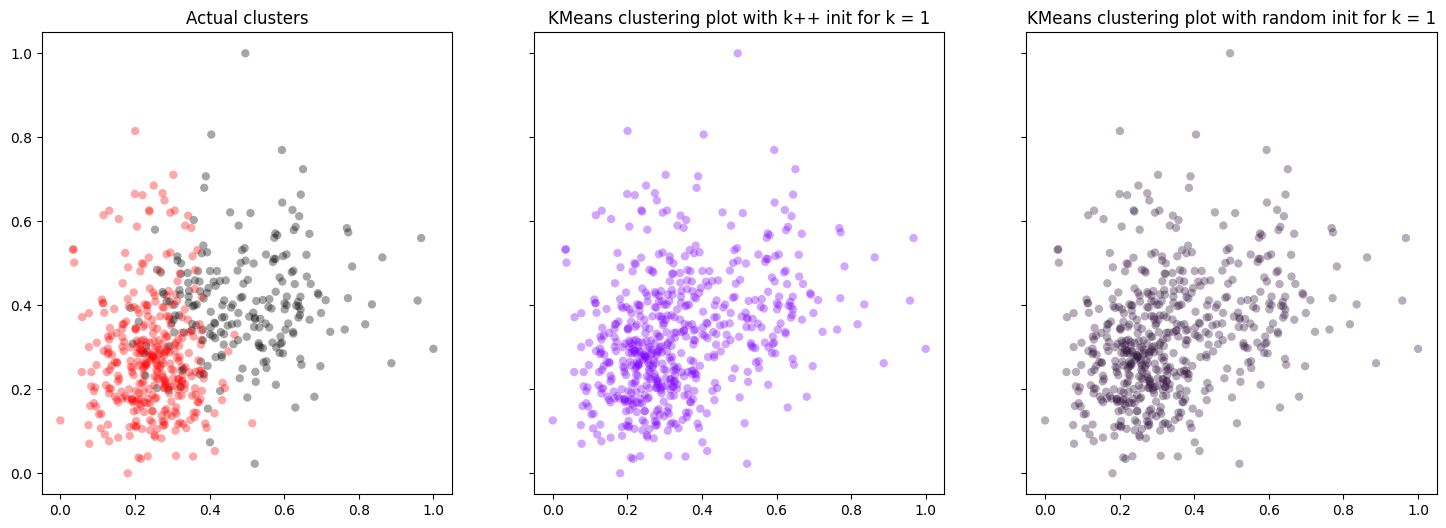

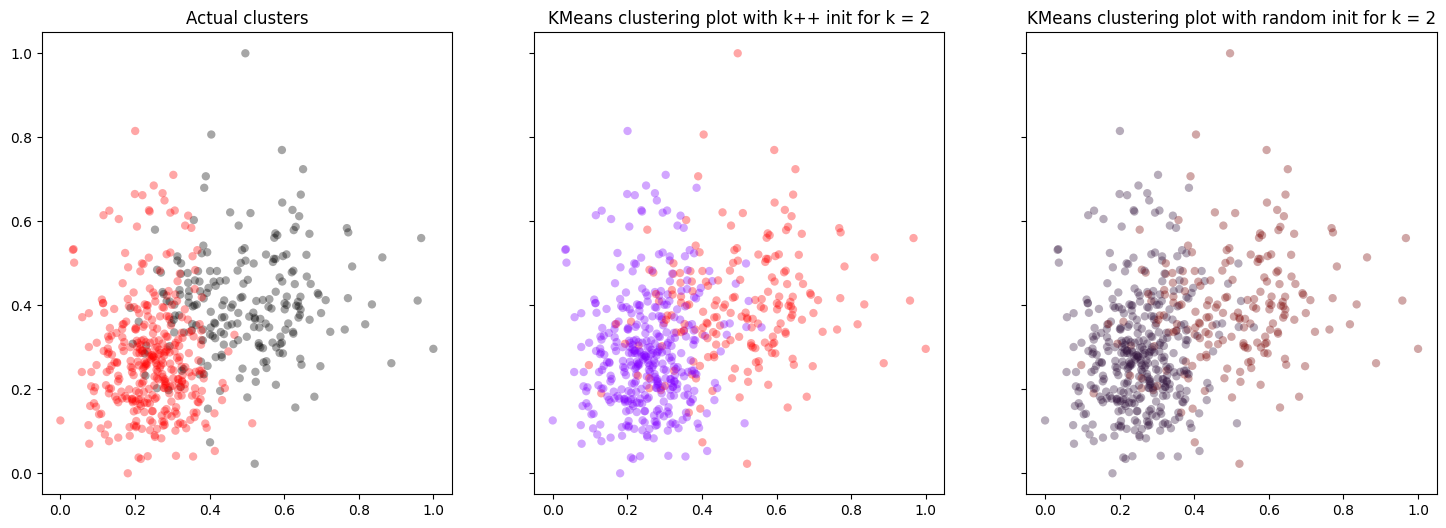

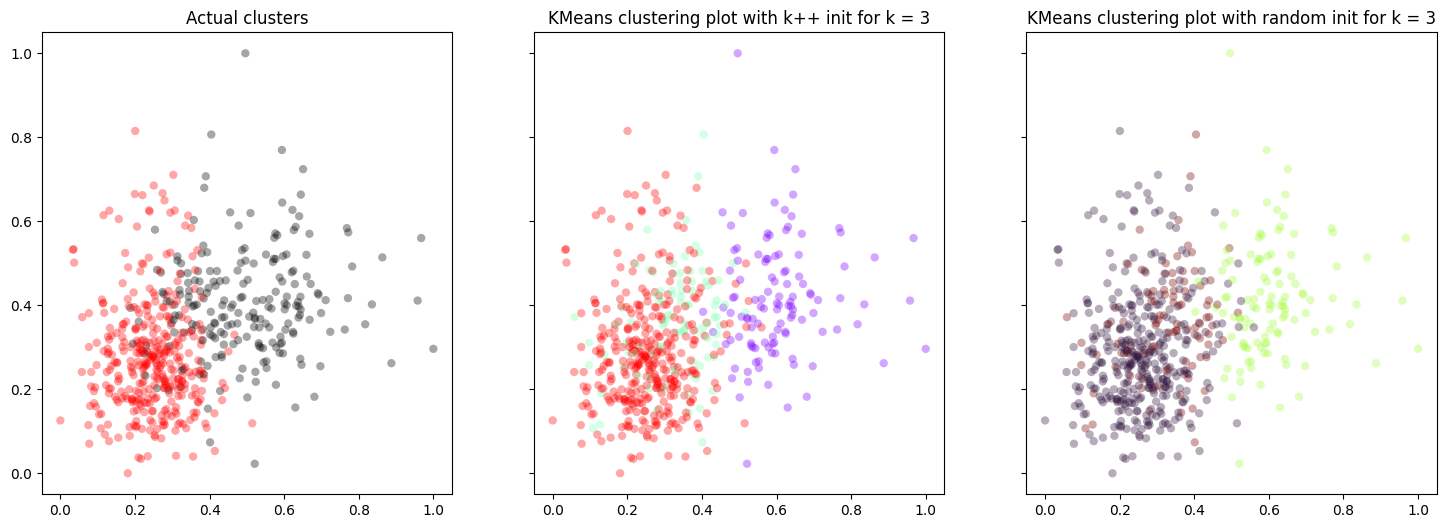

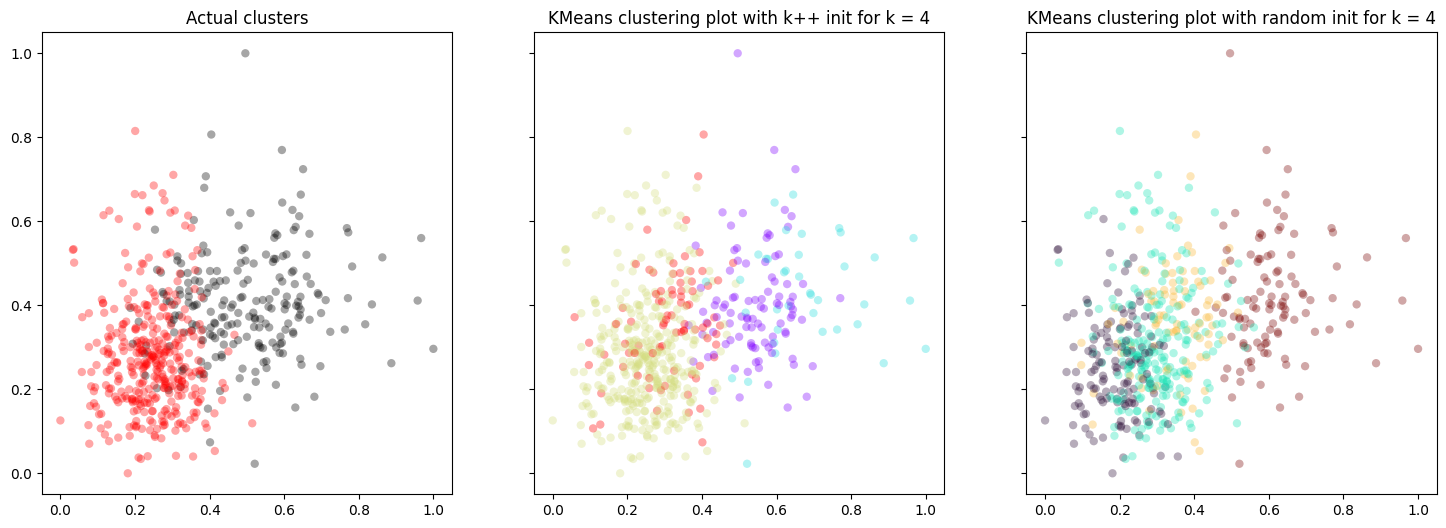

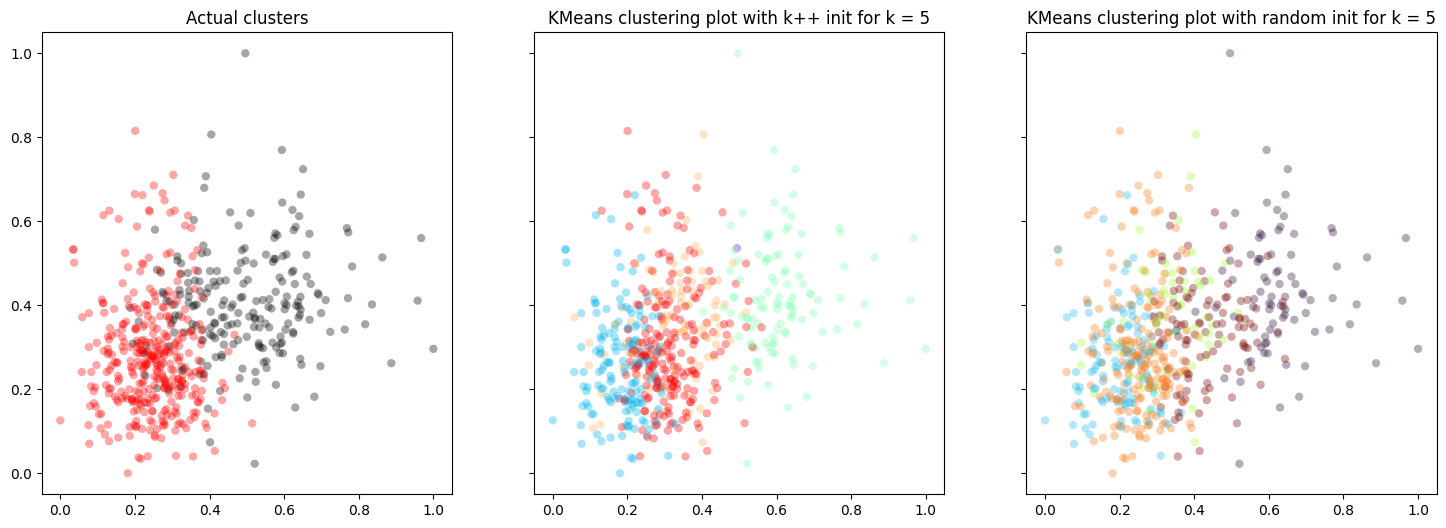

In [12]:
# Extract features from the dataset
X = data.drop('Diagnosis', axis=1).values

# Iterate over different values of k
for i in range(1, 6):
    # Perform KMeans clustering with k-means++ initialization
    km1 = KMeans(k=i, initialization="k-means++")
    km1_labels, km1_centroids = km1.fit(X)
    
    # Perform KMeans clustering with random initialization
    km2 = KMeans(k=i, initialization="random")
    km2_labels, km2_centroids = km2.fit(X)
    
    # Create a subplot for each k value
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
    
    # Plot the actual clusters
    ax1.scatter(X[:,0], X[:,1], c=data["Diagnosis"], cmap="flag", edgecolor="None", alpha=0.35)
    ax1.set_title("Actual clusters")
    
    # Plot the KMeans clustering result with k-means++ initialization
    ax2.scatter(X[:,0], X[:,1], c=km1_centroids, cmap="rainbow", edgecolor="None", alpha=0.35)
    ax2.set_title("KMeans clustering plot with k++ init for k = " + str(i))
    
    # Plot the KMeans clustering result with random initialization
    ax3.scatter(X[:,0], X[:,1], c=km2_centroids, cmap="turbo", edgecolor="None", alpha=0.35)
    ax3.set_title("KMeans clustering plot with random init for k = " + str(i))


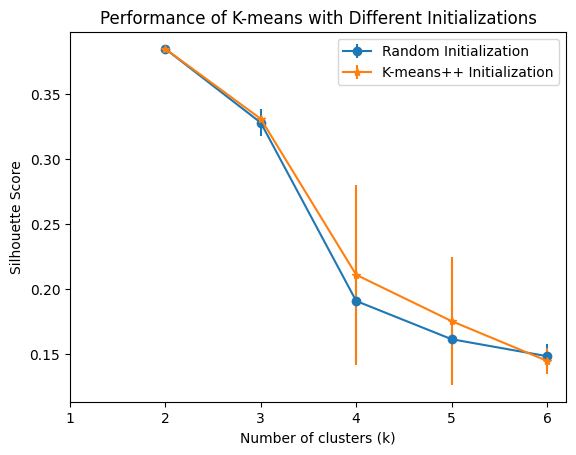

In [13]:
def evaluate_clustering(X, k, initialization='random'):
    """
    Now we need to evaluate the KMeans clustering performance with the aid of a  silhouette score, we define a method to check 
    the scores for various k values and initialization methods. All of the results are stored and later when returned we have
    the scores in arrays that will help us plot the performance.
    """
    silhouette_scores = []

    for _ in range(10):
        kmeans = KMeans(k, initialization=initialization)
        centroids, labels = kmeans.fit(X)
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)

    avg_score = np.mean(silhouette_scores)
    std_score = np.std(silhouette_scores)
    
    return avg_score, std_score

# Range of k values to evaluate
ks = range(2, 7)
random_scores = []
kmeanspp_scores = []

# Evaluate clustering performance for each k value
for k in ks:
    avg_random, std_random = evaluate_clustering(X, k, initialization='random')
    avg_kmeanspp, std_kmeanspp = evaluate_clustering(X, k, initialization='k-means++')
    random_scores.append((avg_random, std_random))
    kmeanspp_scores.append((avg_kmeanspp, std_kmeanspp))

random_scores = np.array(random_scores)
kmeanspp_scores = np.array(kmeanspp_scores)

# Plot the results
plt.errorbar(ks, random_scores[:, 0], yerr=random_scores[:, 1], label='Random Initialization', marker='o')
plt.errorbar(ks, kmeanspp_scores[:, 0], yerr=kmeanspp_scores[:, 1], label='K-means++ Initialization', marker='*')

plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Performance of K-means with Different Initializations')
plt.xticks(np.arange(1, 7, 1))
plt.legend()
plt.show()


### DBSCAN Implementation

In [14]:
class DB_SCAN:  
    def __init__(self, epsilon_value, min_cluster_vals): 
        """
        Initializing the DBSCAN object that has the arguments epsilon_value which is the radius of the cluster and the min_cluster_vals
        that is a threshold to tell if the cluster is good or an outlier.
        """
        self.epsilon_value = epsilon_value 
        self.min_cluster_vals = min_cluster_vals 
        
    def grow(self, pointindex, neigh, label): 
        """
        Now using this method we recursively expand the cluster by adding reachable points to the current cluster.
        """
        self.labels[pointindex] == label
        
        # Iterate over the neighboring points
        for ng in neigh:
            # If the neighboring point is noise
            if self.labels[ng] == -1:  
                self.labels[ng] = label
            # If the neighboring point is not assigned to any cluster
            elif self.labels[ng] == 0:  
                self.labels[ng] = label  
                adj_neigh = np.array([iter for iter, element in enumerate(self.X) if (((sum((element-self.X[ng])**2)**0.5) <= self.epsilon_value) and (iter != ng))])  
                # If there are enough adjacent neighbors
                if len(adj_neigh) >= self.min_cluster_vals:  
                    self.grow(pointindex=ng, neigh=adj_neigh, label=label)  

    def fit(self, X):  
        """
        This method is to fit the DBSCAN model to the data.
        """
        self.X = X  
        self.labels = [0] * self.X.shape[0]  
        
        cid = 1  

        # Iterate over each data point
        for ind in range(0, self.X.shape[0]):
            # If the data point is not assigned to any cluster
            if self.labels[ind] == 0:  
                neigh = np.array([iter for iter, element in enumerate(self.X) if (((sum((element-self.X[ind])**2)**0.5) <= self.epsilon_value) and (iter != ind))])
                # If there are not enough neighboring points
                if len(neigh) < self.min_cluster_vals:  
                    self.labels[ind] = -1  
                else: 
                    self.grow(ind, neigh=neigh, label=cid)  
                    cid += 1  
        # Return the cluster labels for each data point
        return self.labels  


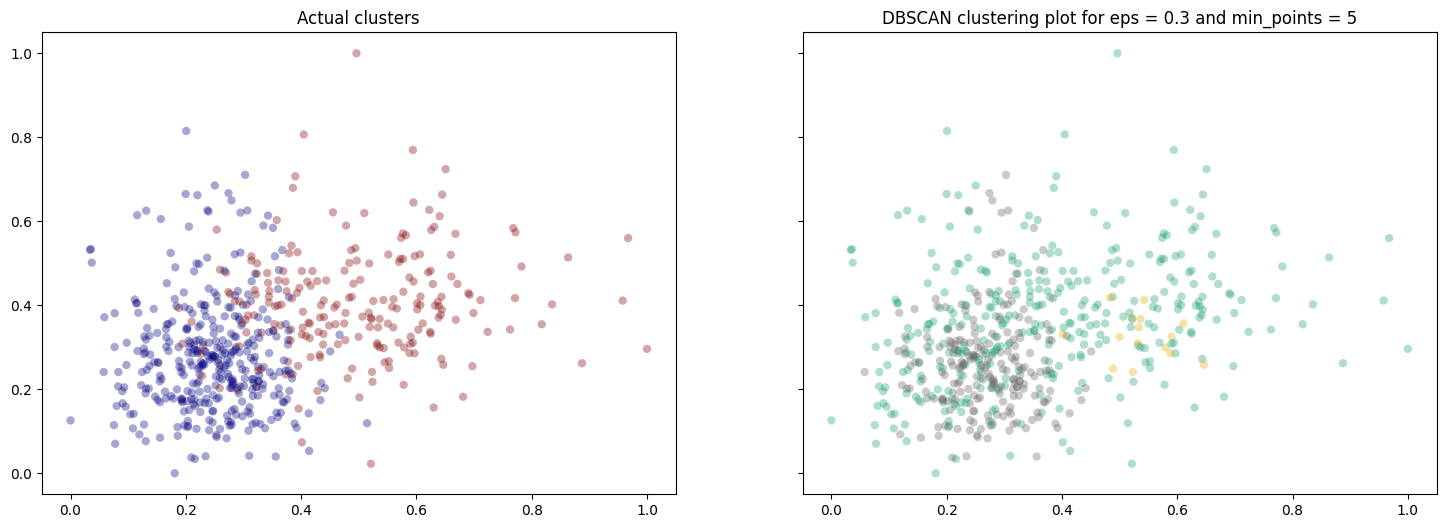

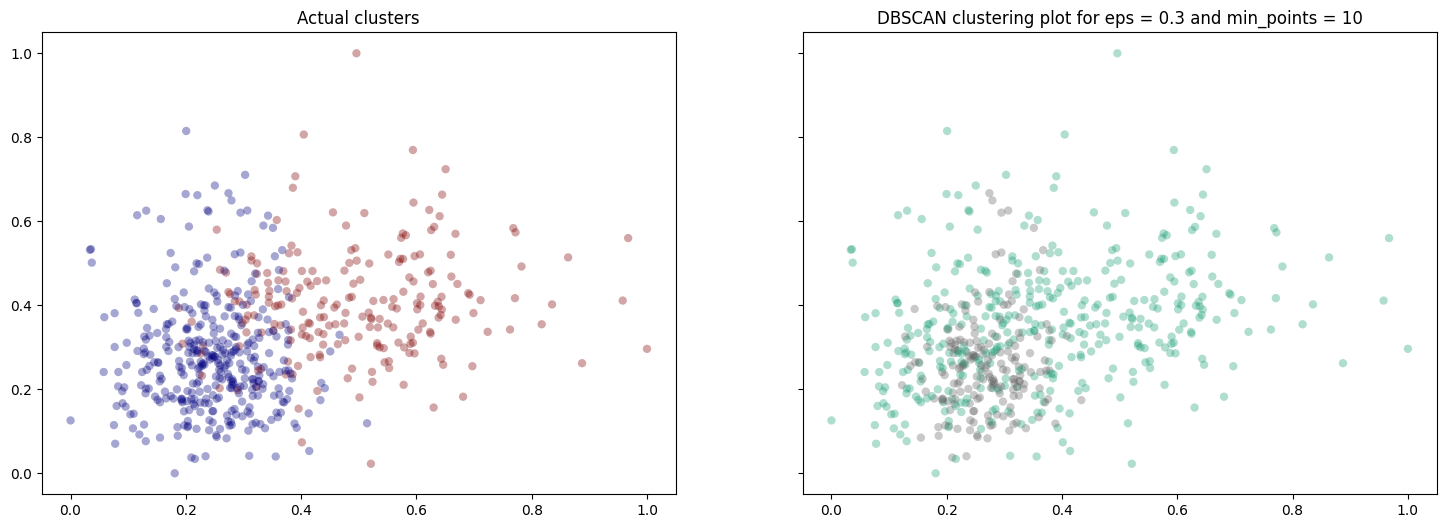

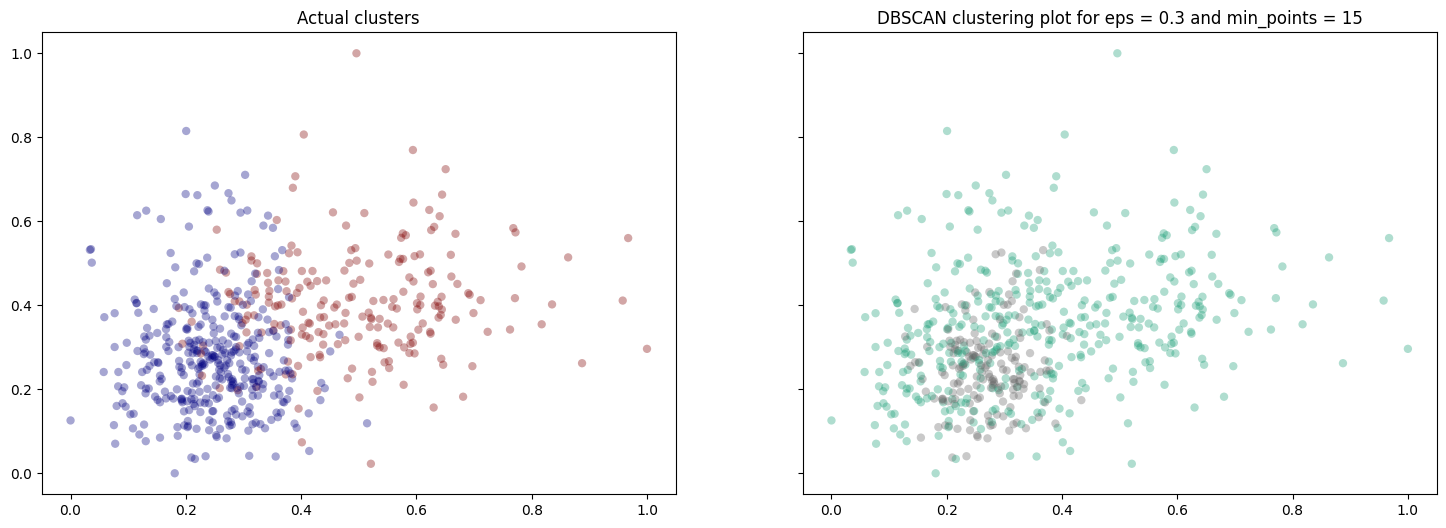

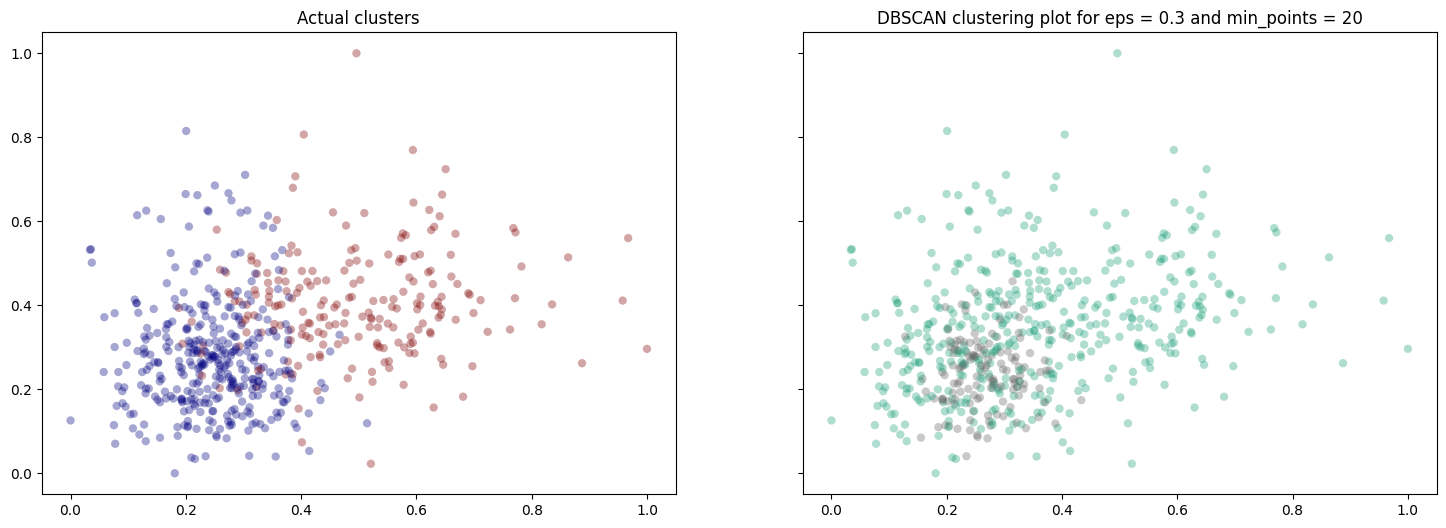

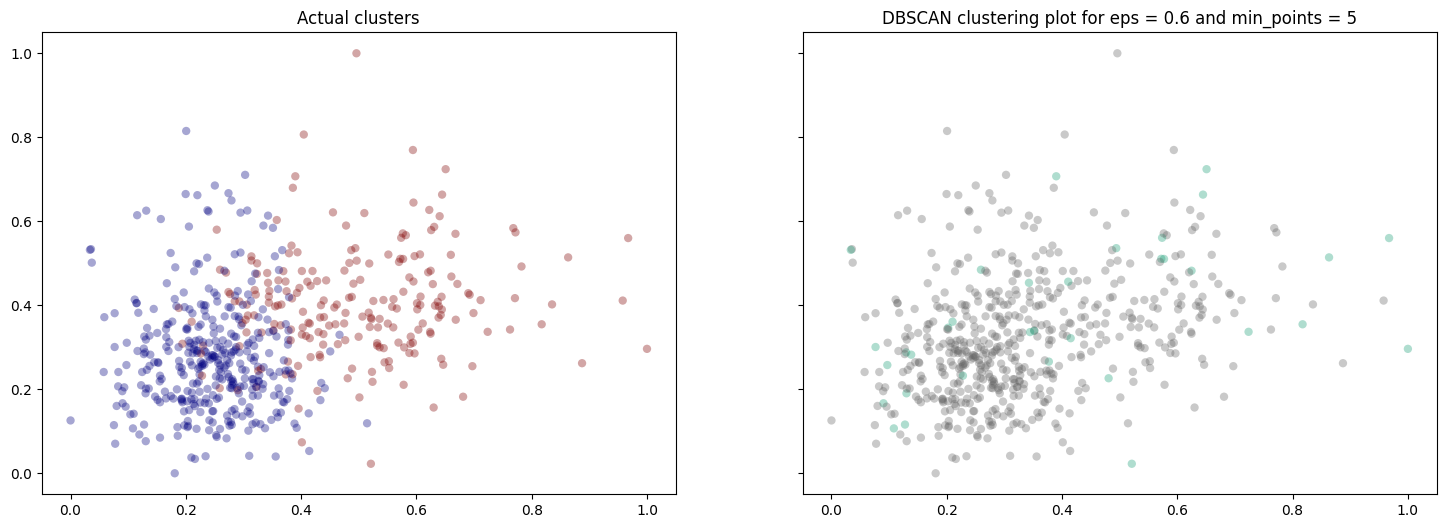

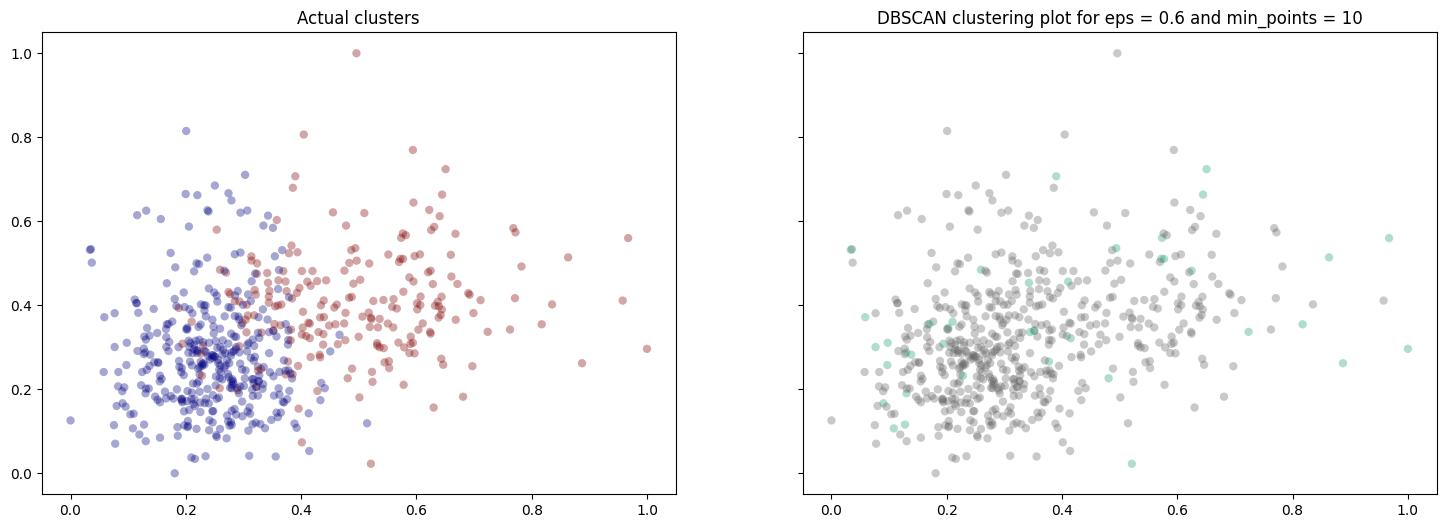

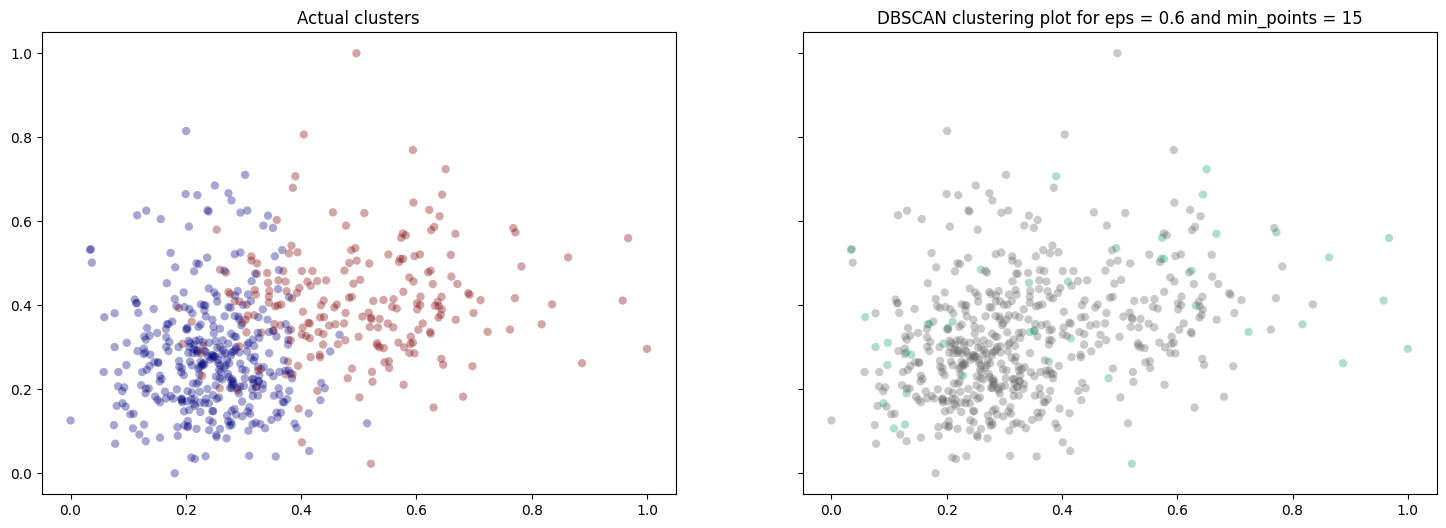

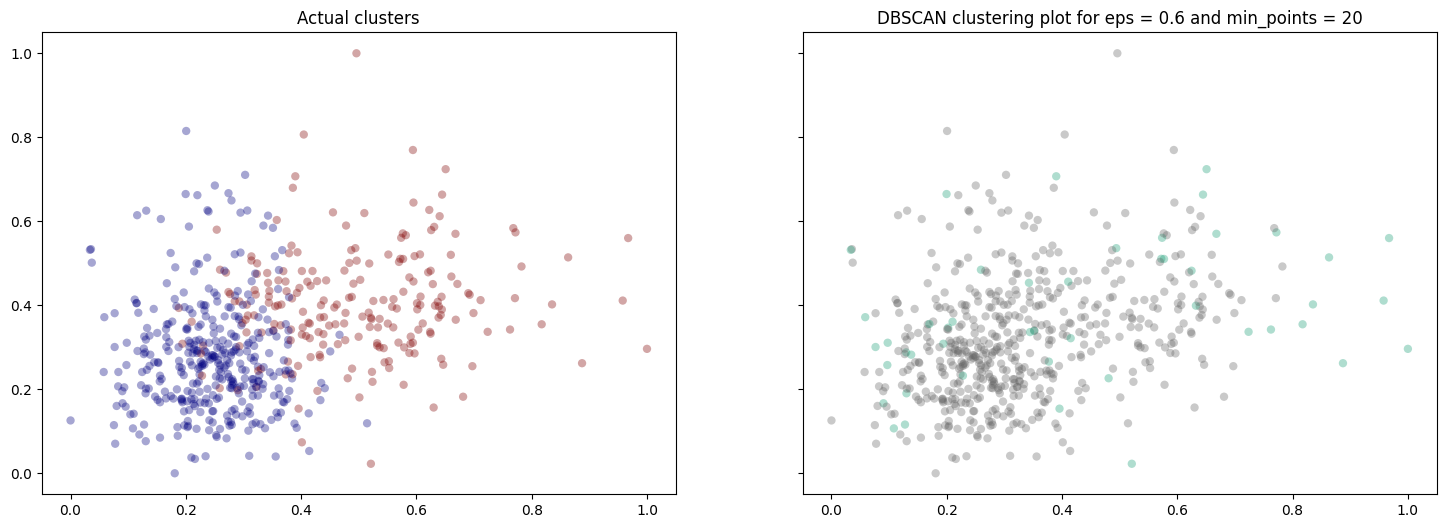

In [15]:
# Define a list of minimum points for clustering
minpointslist = [5, 10, 15, 20]
# Define a list of epsilon values for clustering radius
rad_list = [0.3, 0.6]  

# Iterate over each epsilon value and minimum points combination
for j in rad_list:
    for i in minpointslist:
        X = data.drop('Diagnosis', axis=1).values  
        dbs = DB_SCAN(epsilon_value=j, min_cluster_vals=i)  
        dbs_pred = dbs.fit(X)
        
        # Create a subplot for each combination
        f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(18, 6))
        
        # Plot the actual clusters
        ax1.scatter(X[:,0], X[:,1], c=data["Diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
        ax1.set_title("Actual clusters")
        
        # Plot the DBSCAN clustering result
        ax2.scatter(X[:,0], X[:,1], c=dbs_pred, cmap="Dark2", edgecolor="None", alpha=0.35)
        ax2.set_title("DBSCAN clustering plot for eps = " + str(j) + " and min_points = " + str(i))


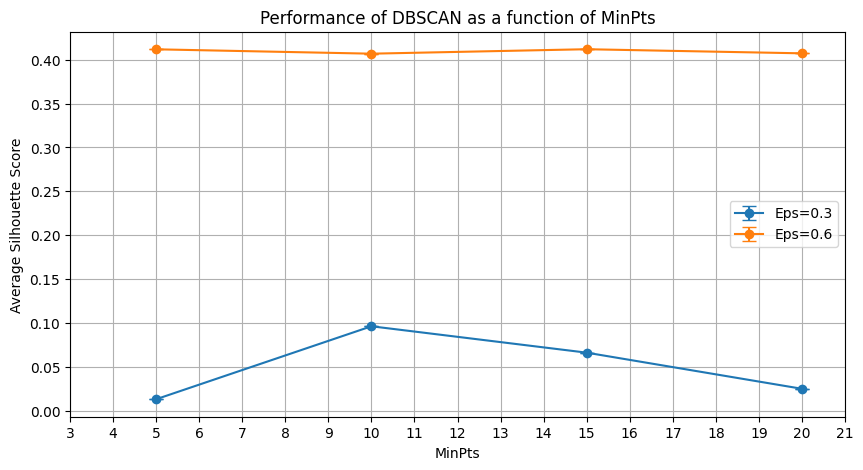

In [16]:
def run_dbscan(X, eps, min_samples):
    # Initialize DBSCAN model
    model = DB_SCAN(epsilon_value=eps, min_cluster_vals=min_samples)  
    # Fit DBSCAN model to the data
    labels = model.fit(X)  
    if len(set(labels)) > 1:  
        score = silhouette_score(X, labels) 
    else:
        score = -1 
    return score

def evaluate_dbscan(X, eps_values, min_samples_values, n_runs=10):
    results = {}
    for eps in eps_values:
        avg_scores = []
        std_scores = []
        for min_samples in min_samples_values:
            scores = [] 
            for _ in range(n_runs):
                # Run DBSCAN with given parameters
                score = run_dbscan(X, eps, min_samples) 
                # If there are multiple clusters
                if score != -1:  
                    scores.append(score)  
            avg_scores.append(np.mean(scores)) 
            std_scores.append(np.std(scores))
        # Store results for current epsilon value
        results[eps] = (avg_scores, std_scores)  
    return results

# List of epsilon values to evaluate
eps_values = [0.3, 0.6]
# List of min_samples values to evaluate
min_samples_values = [5, 10, 15, 20]  

results = evaluate_dbscan(X, eps_values, min_samples_values)

plt.figure(figsize=(10, 5))  

for eps in eps_values:
    avg_scores, std_scores = results[eps]  
    plt.errorbar(min_samples_values, avg_scores, yerr=std_scores, label=f'Eps={eps}', marker='o', capsize=5)

plt.xlabel('MinPts')
plt.ylabel('Average Silhouette Score')
plt.title('Performance of DBSCAN as a function of MinPts')
plt.xticks(np.arange(3, 22, 1))
plt.legend()
plt.grid(True)
plt.show()


### Spectral Clustering Implementation

In [17]:
class Clustering:
    def __init__(self, k, initialization='k-means++', sigma=1.0):
        """
        A Clustering object is defined that has the arguments k that tell the number of clusters to generate and the initialization
        methiod for kmeans and  a sigma value that is the gaussian similarity
        """
        self.k = k
        self.initialization = initialization
        self.sigma = sigma
        self.final_labels = None  
        self.centr = None

    def unnormalized_spectral_clustering(self, X):
        """
        We now write a method for unnormalized spectral clustering on the input data X.
        """
        # Compute pairwise squared Euclidean distances
        pairwise_sq_dists = squareform(pdist(X, 'sqeuclidean'))
        # Compute Gaussian similarity
        weighted_adj_matrix = np.exp(-pairwise_sq_dists / (2.0 * self.sigma ** 2))
        # Compute diagonal degree matrix
        diag_matrix = np.diag(weighted_adj_matrix.sum(axis=1))  
        # Compute Laplacian matrix
        laplacian = diag_matrix - weighted_adj_matrix  
        # Compute eigenvectors corresponding to smallest eigenvalues
        eigvals, eigvecs = eigh(laplacian, subset_by_index=[0, self.k-1])  
        # Select the first k eigenvectors
        new_matrix = eigvecs[:, :self.k]  
        # Initialize k-means
        kmeans = KMeans(k=self.k, initialization=self.initialization)  
         # Fit k-means to the lower-dimensional data
        km1_centroids, km1_labels = kmeans.fit(new_matrix) 
        self.final_labels = km1_labels 
        self.centr = km1_centroids  
        return self.final_labels  


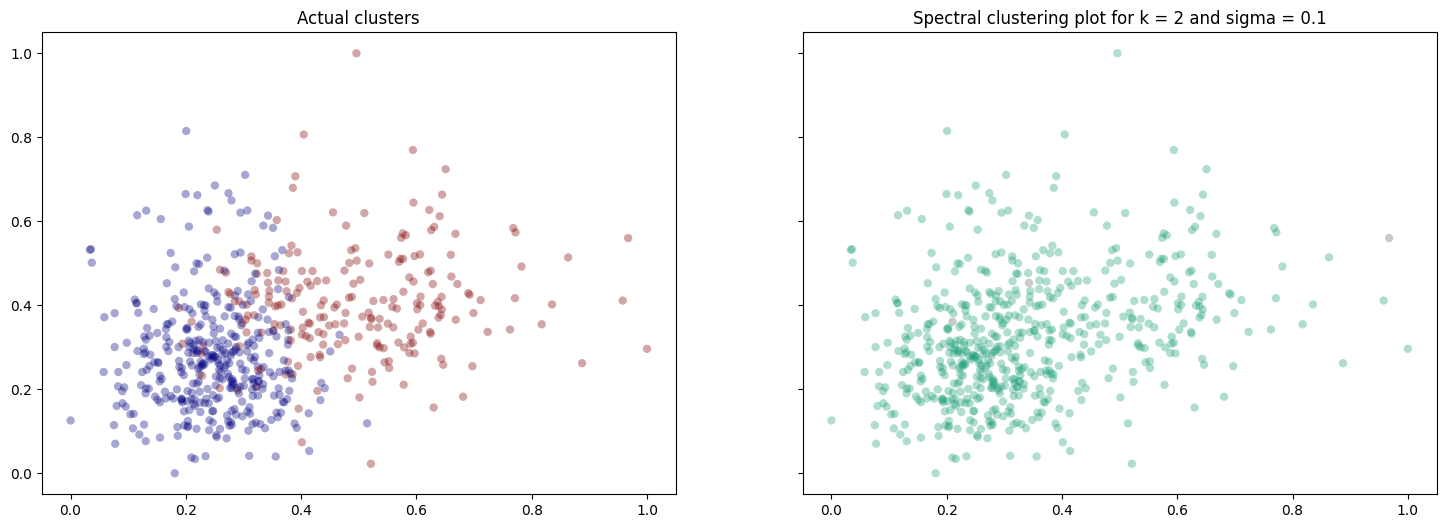

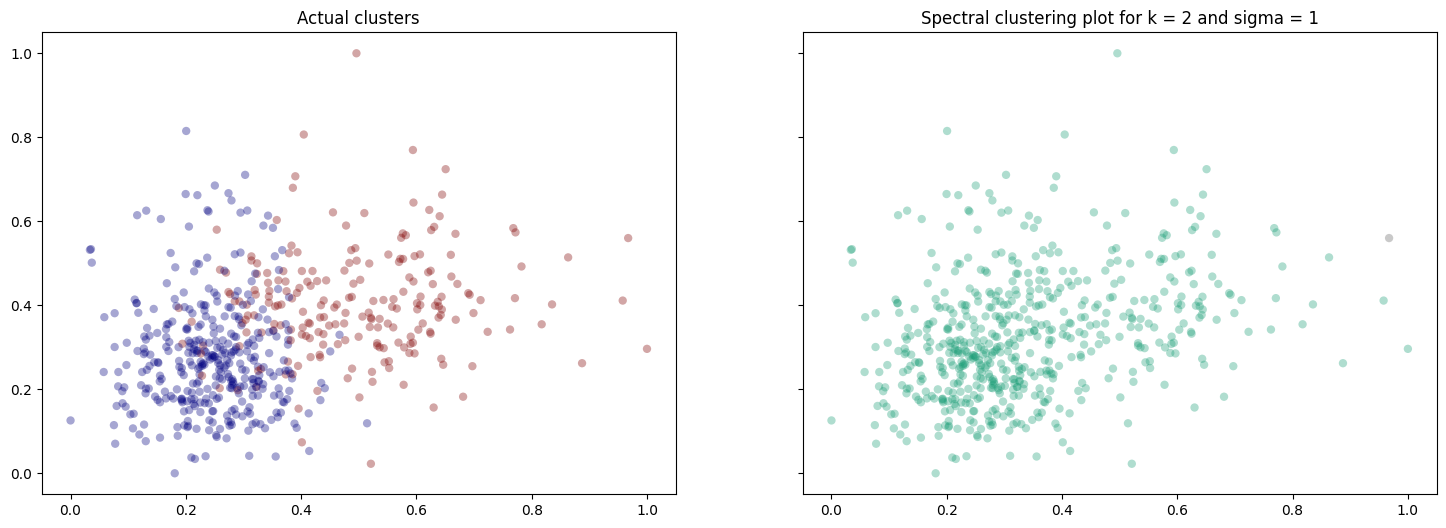

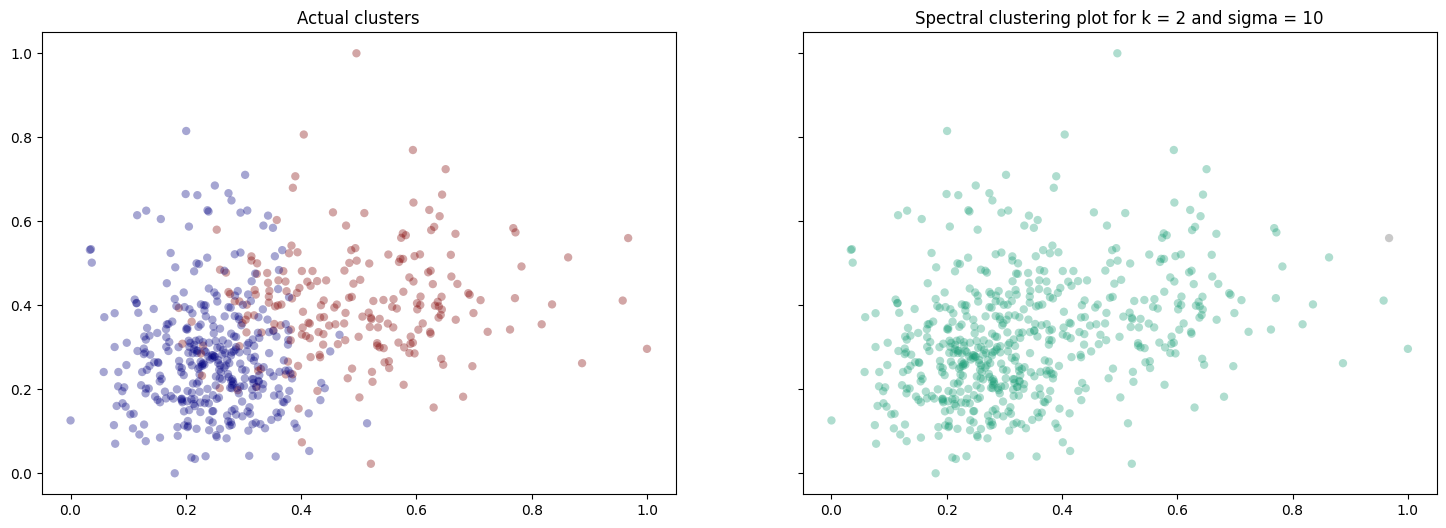

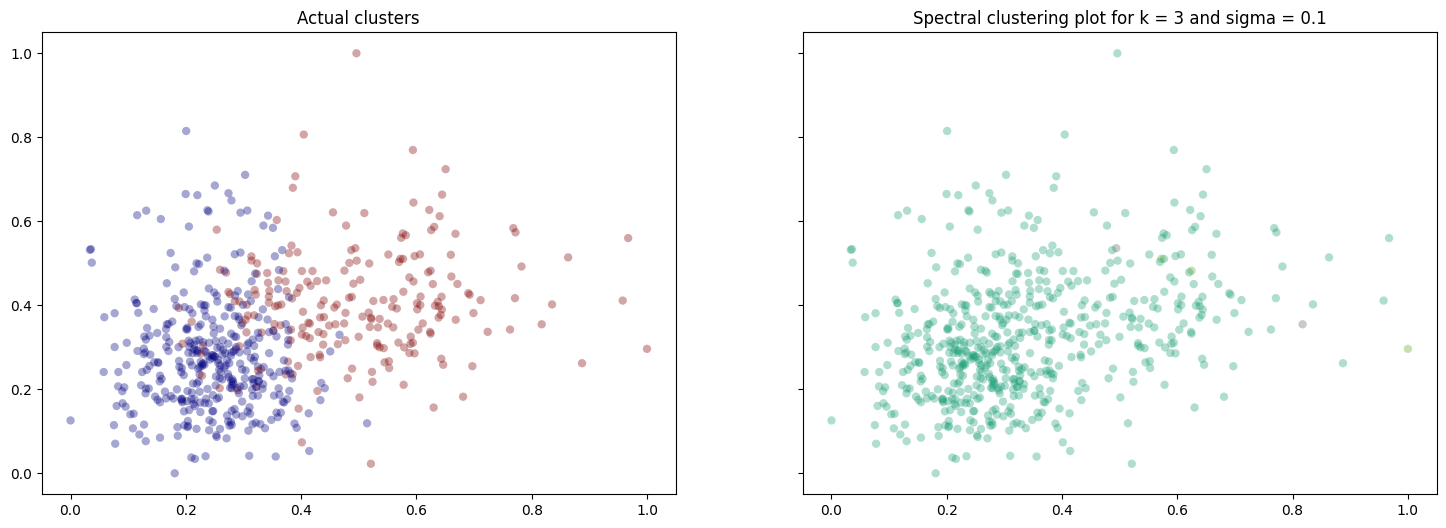

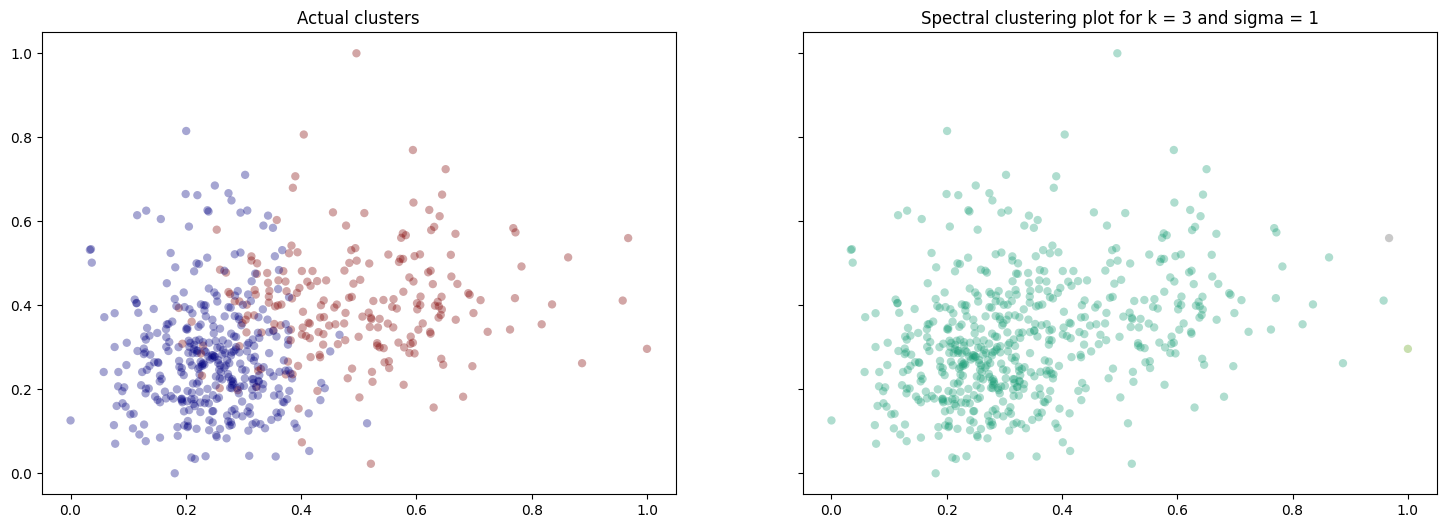

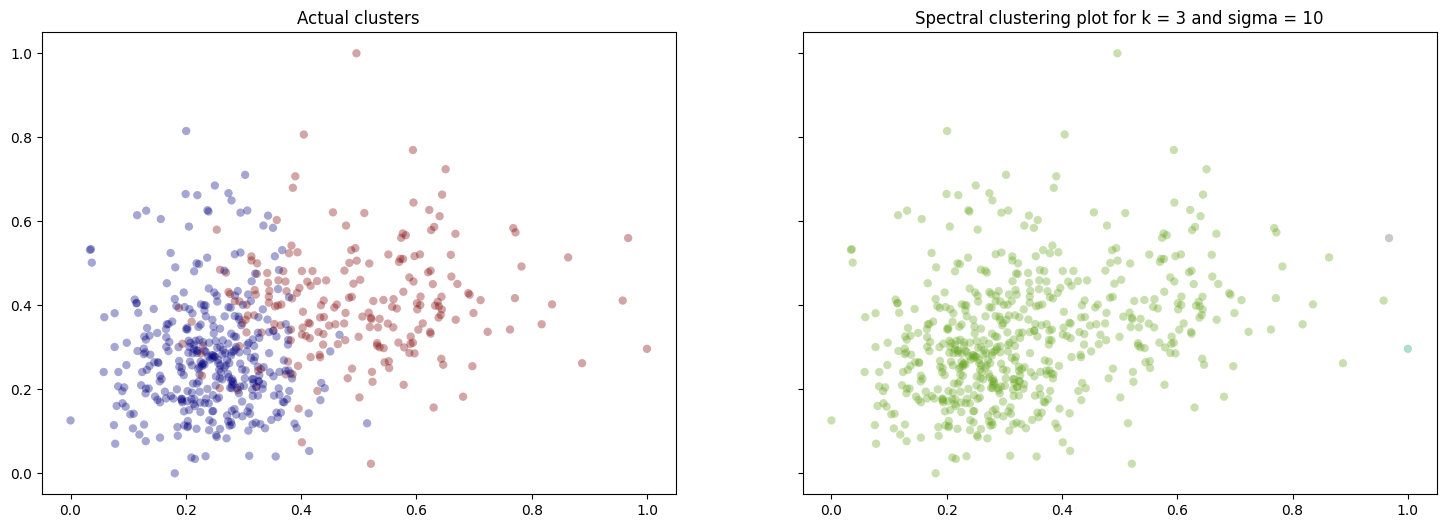

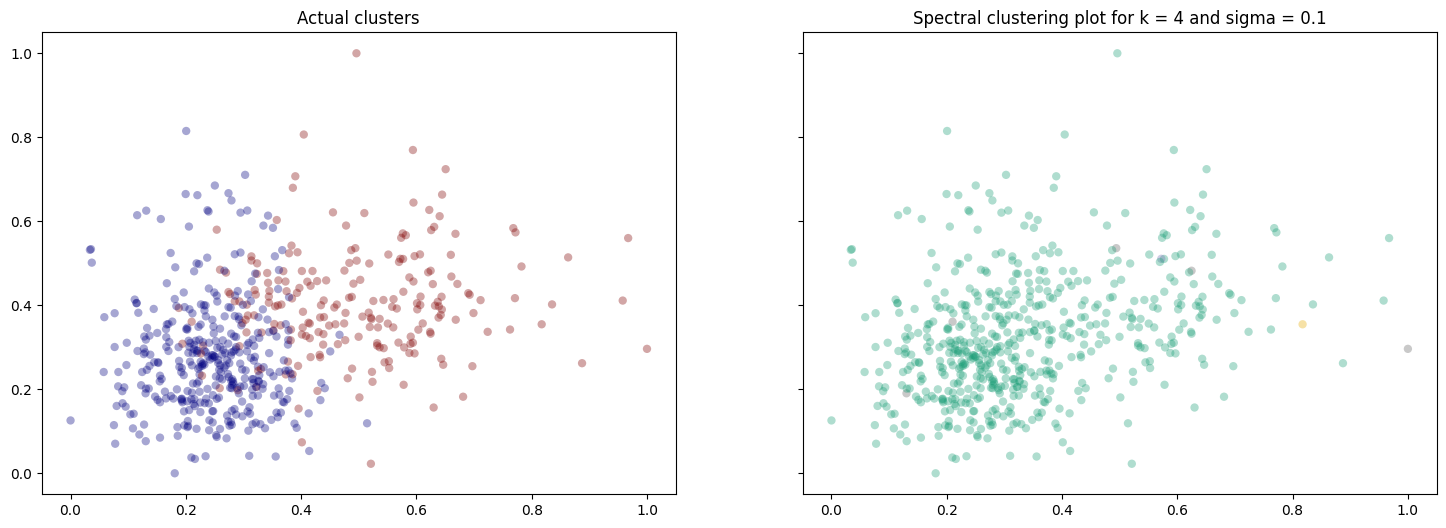

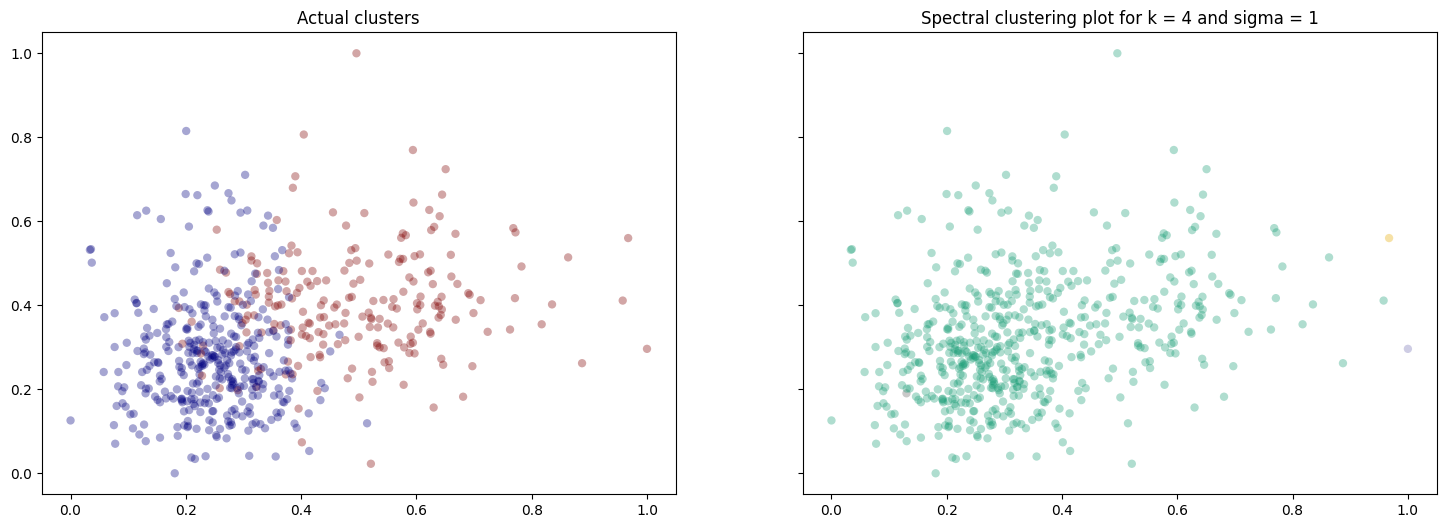

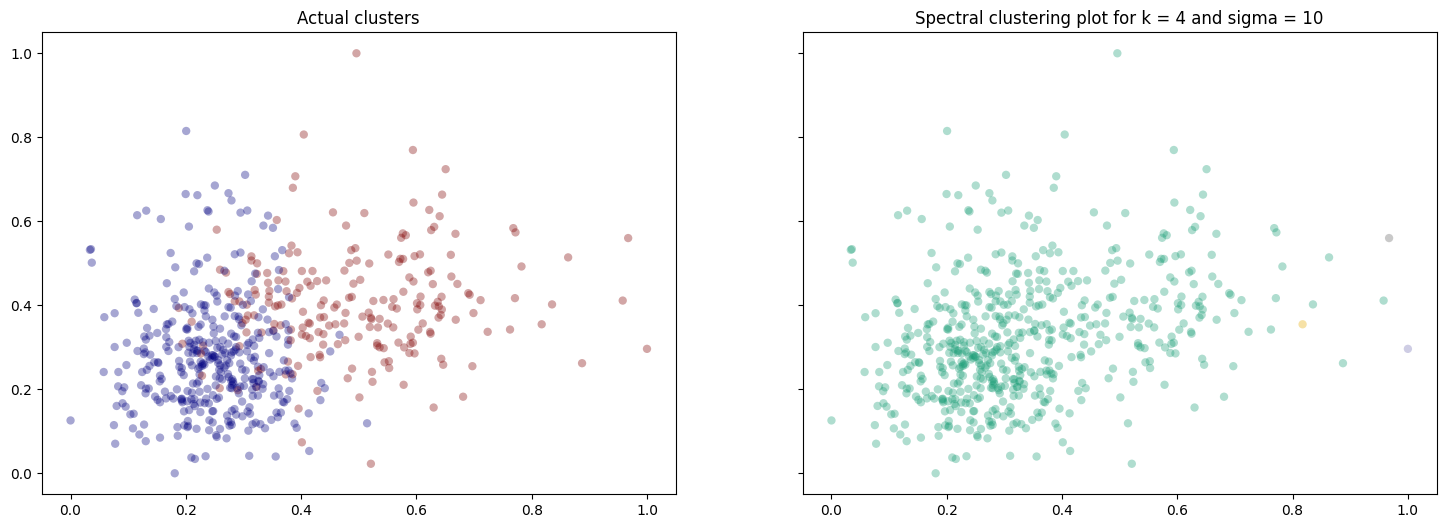

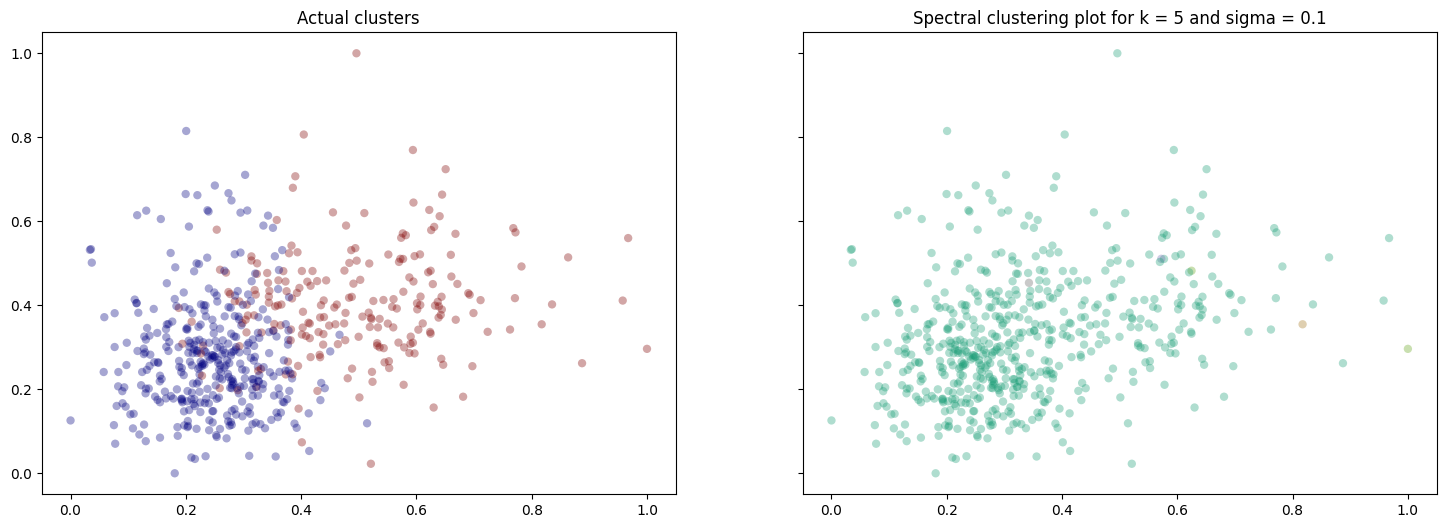

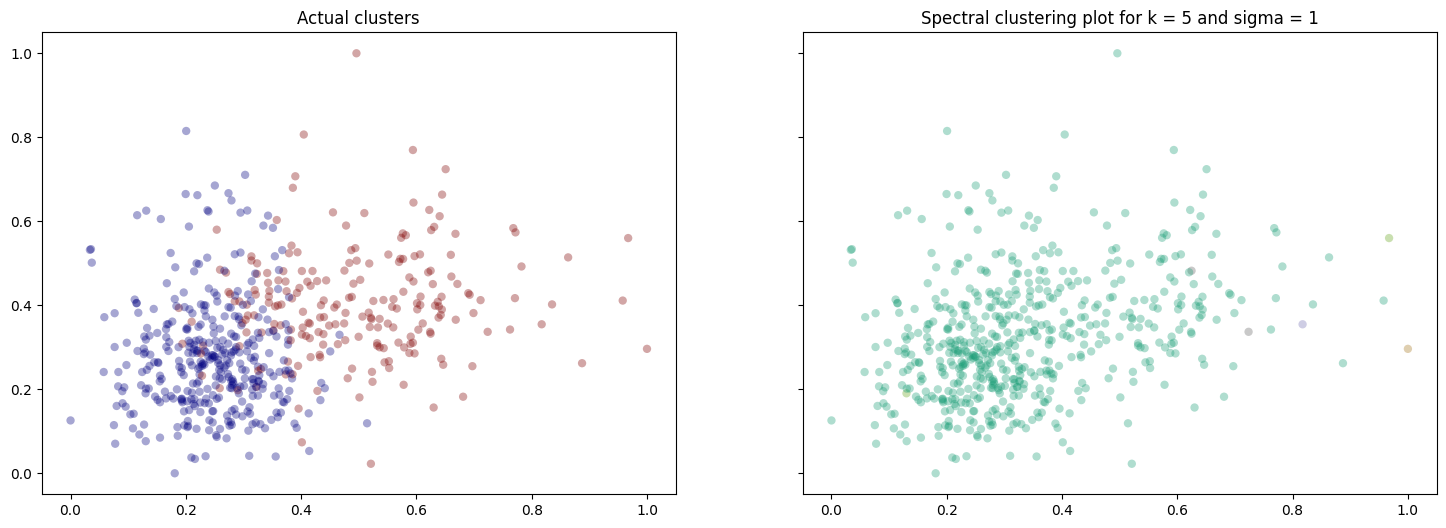

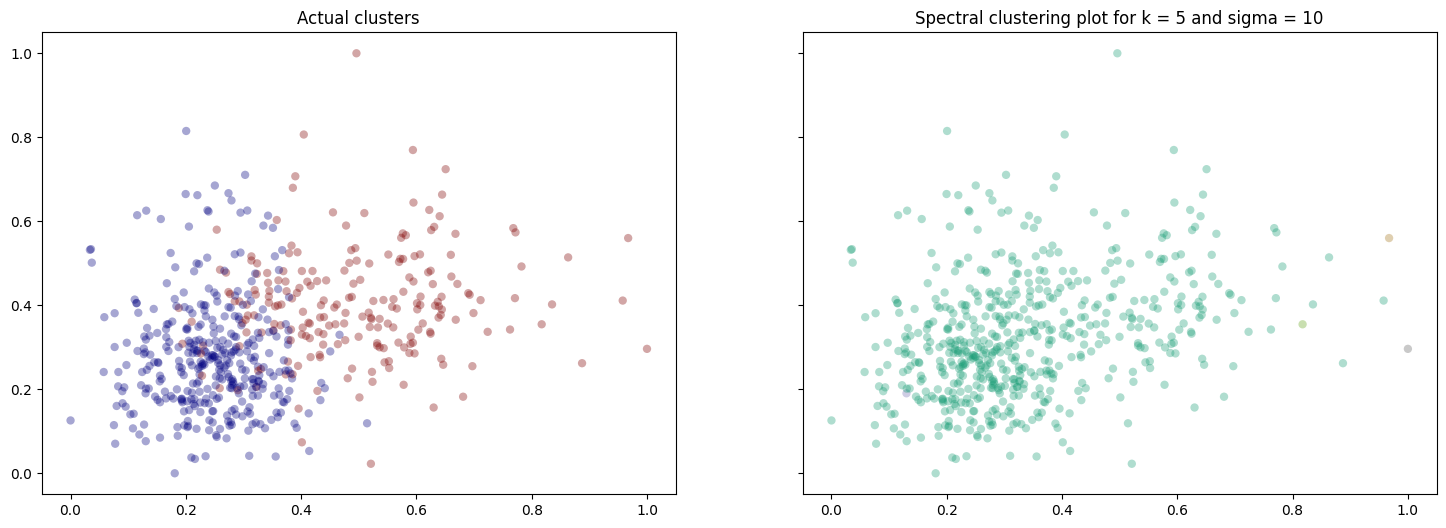

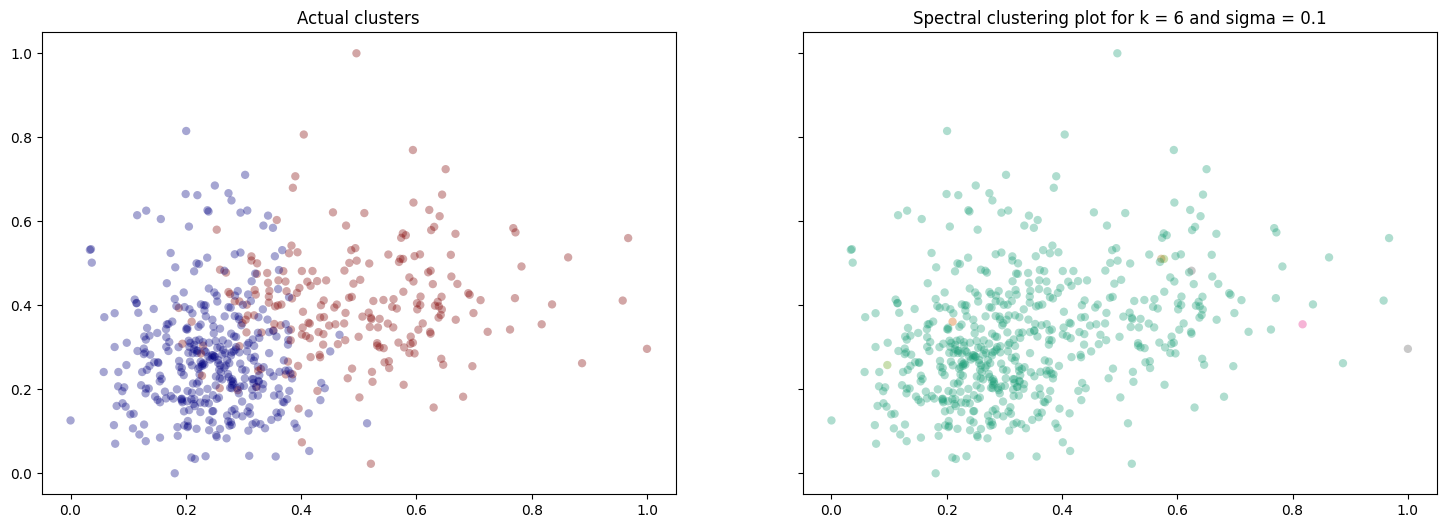

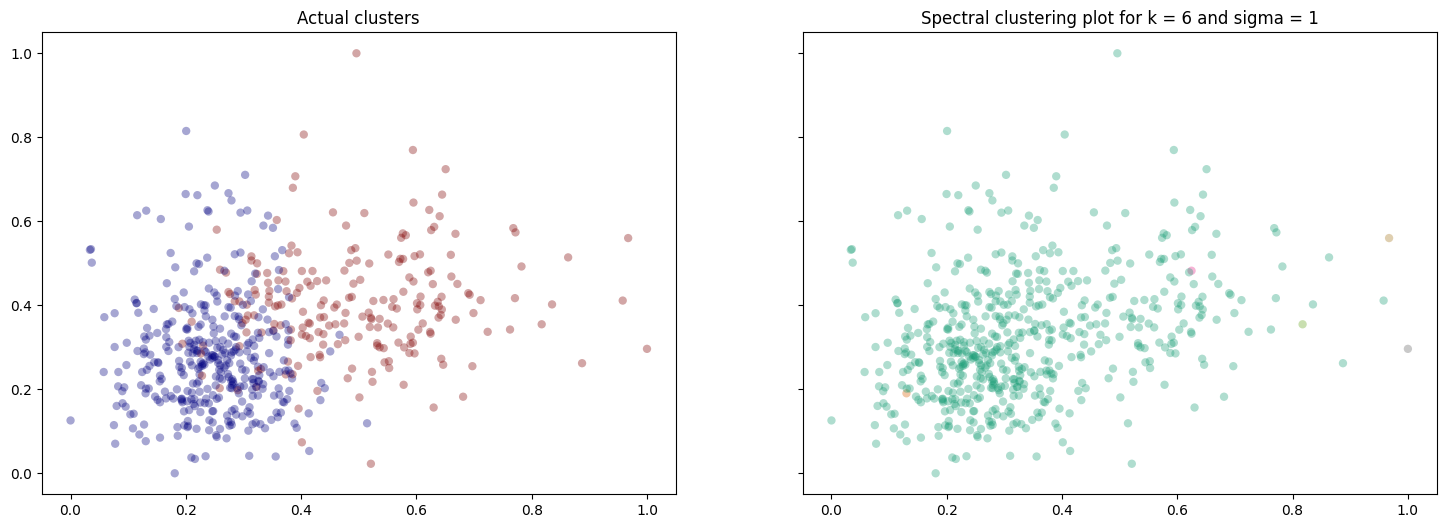

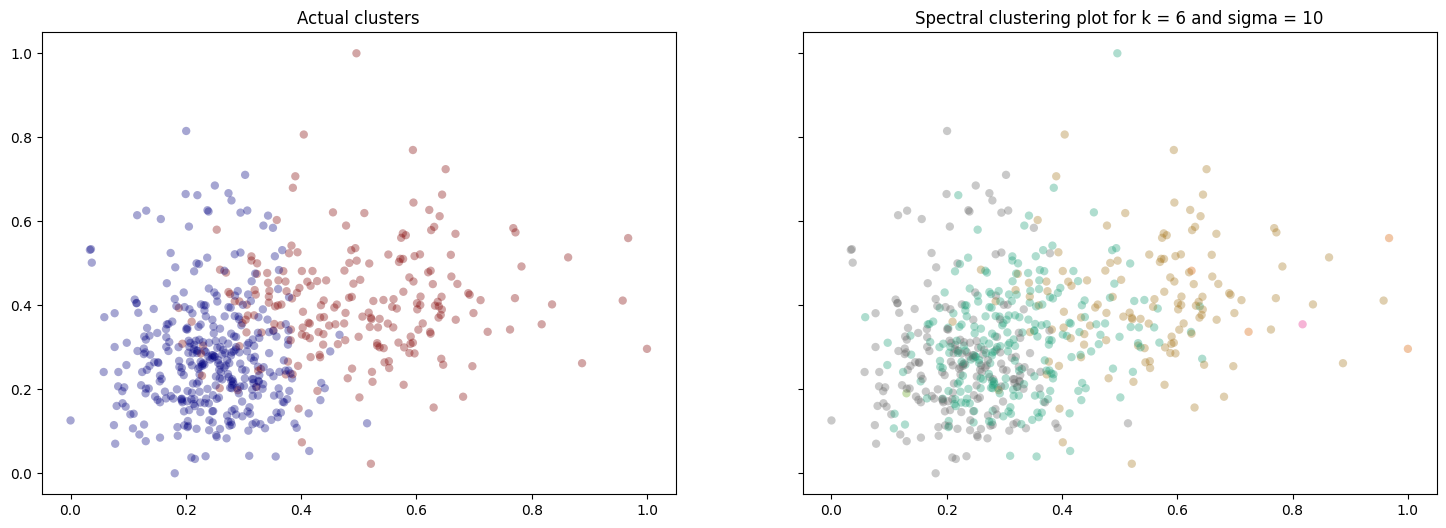

In [18]:
# List of k values for clustering
k_values = [2,3,4,5,6]  
# List of sigma values for Gaussian similarity
sigma_values = [0.1, 1, 10]  

for i in k_values:  
    for j in sigma_values:  
        X = data.drop('Diagnosis', axis=1).values 
        specclus = Clustering(k=i, sigma=j) 
        labels = specclus.unnormalized_spectral_clustering(X)  # Perform spectral clustering
        
        # Create a plot with two subplots
        f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(18, 6))
        
        # Plot the actual clusters in the first subplot
        ax1.scatter(X[:,0], X[:,1], c=data["Diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
        ax1.set_title("Actual clusters")
        
        # Plot the spectral clustering result in the second subplot
        ax2.scatter(X[:,0], X[:,1], c=labels, cmap="Dark2", edgecolor="None", alpha=0.35)
        ax2.set_title("Spectral clustering plot for k = " + str(i)+ " and sigma = " + str(j))


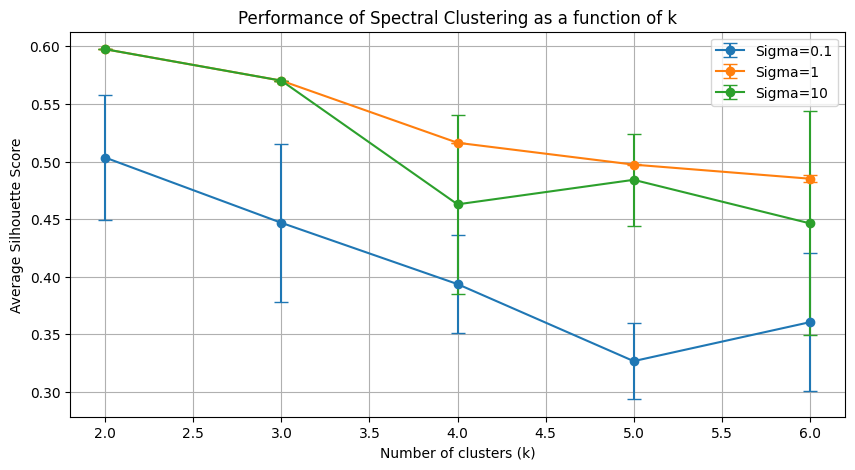

In [19]:
def evaluate_spectral_clustering(X, k_values, sigma_values, n_runs=10):
    """
    Evaluate spectral clustering with different k and sigma values.
    """
    results = {}
    for sigma in sigma_values:
        avg_scores = []
        std_scores = []
        for k in k_values:
            scores = []
            for _ in range(n_runs):
                specclus = Clustering(k=k, sigma=sigma)
                labels = specclus.unnormalized_spectral_clustering(X)
                if len(set(labels)) > 1:  # Ensure labels are unique
                    score = silhouette_score(X, labels)
                    scores.append(score)
            avg_scores.append(np.mean(scores))
            std_scores.append(np.std(scores))
        results[sigma] = (avg_scores, std_scores)
    return results

k_values = range(1, 7)
sigma_values = [0.1, 1, 10]

X = data.drop('Diagnosis', axis=1).values
results = evaluate_spectral_clustering(X, k_values, sigma_values)

plt.figure(figsize=(10, 5))

for sigma in sigma_values:
    avg_scores, std_scores = results[sigma]
    plt.errorbar(k_values, avg_scores, yerr=std_scores, label=f'Sigma={sigma}', marker='o', capsize=5)

plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Performance of Spectral Clustering as a function of k')
plt.legend()
plt.grid(True)
plt.show()


### Isolation Tree Implementation

In [20]:
# Isolation Tree class for constructing individual trees in Isolation Forest
class IsolationTree:
    def __init__(self, max_h):
        """
        Initialize an Isolation Tree with parameters max_h that is the max height of the tree.
        """
        self.max_h = max_h
        self.left_stree = None
        self.right_stree = None
        self.feature_split = None
        self.threshold = None
        self.size = 0
        self.height = 0

    # Fit method to recursively build the tree
    def fit(self, X, curr_h=0):
        """
        Now we fit the tree recursively.
        """
        rows, col_count = X.shape
        # If max height is reached or only one instance remains, set size and return
        if curr_h >= self.max_h or rows <= 1:
            self.size = rows
            return

        # Randomly select feature and threshold for splitting
        self.feature_split = random.randint(0, col_count - 1)
        self.threshold = np.random.uniform(np.min(X[:, self.feature_split]), np.max(X[:, self.feature_split]))

        # Split data based on the threshold
        lfeatures = X[:, self.feature_split] < self.threshold
        rfeatures = X[:, self.feature_split] >= self.threshold

        # Recursively build left and right subtrees
        self.left_stree = IsolationTree(self.max_h)
        self.right_stree = IsolationTree(self.max_h)

        self.left_stree.fit(X[lfeatures], curr_h + 1)
        self.right_stree.fit(X[rfeatures], curr_h + 1)

        self.size = rows
        self.height = curr_h

    # Calculate the path length of an instance in the tree
    def path_length(self, X):
        """
        This method calculates the path length of an instance in the tree.
        """
        if self.size <= 1 or self.left_stree is None or self.right_stree is None:
            return self.height

        if X[self.feature_split] < self.threshold:
            return self.left_stree.path_length(X)
        else:
            return self.right_stree.path_length(X)


# Isolation Forest class for building the forest and calculating anomaly scores
class IsolationForest:
    def __init__(self, max_trees=100, subspace=256):
        """
        Initialize of  Isolation Forest that takes parameter max_trees which define the maximum number of isolation trees that can be used.
        """
        self.max_trees = max_trees
        self.subspace = subspace
        self.tree_coll = []

    # Fit method to build the forest
    def fit(self, X):
        """
        This method is to build the Isolation Forest itself.
        """
        self.tree_coll = []
        max_h = int(np.ceil(np.log2(self.subspace)))

        # Create each tree in the forest
        for _ in range(self.max_trees):
            if self.subspace <= X.shape[0]:
                subsample = X[np.random.choice(X.shape[0], self.subspace, replace=False)]
            else:
                subsample = X

            tree = IsolationTree(max_h)
            tree.fit(subsample)
            self.tree_coll.append(tree)

    # Calculate anomaly scores for each instance in the dataset
    def anomaly_score(self, X):
        """
        This method calculates anomaly scores for each instance in the dataset.
        """
        scores = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            path_lengths = [tree.path_length(X[i]) for tree in self.tree_coll]
            scores[i] = 2 ** (-np.mean(path_lengths) / c(self.subspace))
        return scores


def c(n):
    """
    This method calculates the normalization factor c(n).
    """
    if n > 2:
        return 2 * (np.log(n - 1) + 0.5772156649) - 2 * (n - 1) / n
    elif n == 2:
        return 1
    return 0


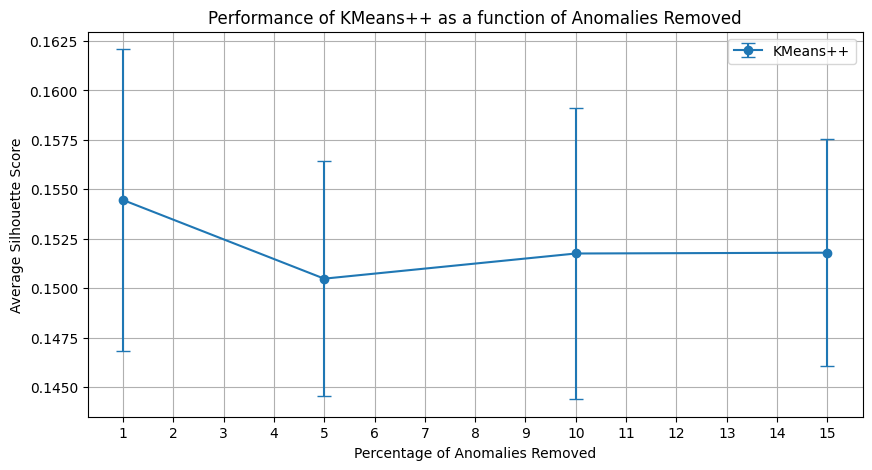

In [21]:
def evaluate_iforest(X, anomaly_fractions, n_runs=10):
    """
    Now we have this method to evaluate Isolation Forest performance by removing anomalies and applying KMeans++ clustering.

    """
    results = {}
    iso_forest = IsolationForest(max_trees=15, subspace=256)
    iso_forest.fit(X)
    scores = iso_forest.anomaly_score(X)

    for fraction in anomaly_fractions:
        threshold = np.percentile(scores, 100 - fraction)
        clean_indices = scores <= threshold
        X_clean = X[clean_indices]

        avg_scores = []
        std_scores = []
        for _ in range(n_runs):
            kmeans = KMeans(k=6, initialization='k-means++')
            _, labels = kmeans.fit(X_clean)
            score = silhouette_score(X_clean, labels)
            avg_scores.append(score)

        results[fraction] = (np.mean(avg_scores), np.std(avg_scores))
    return results

# Define anomaly fractions to evaluate
anomaly_fractions = [1, 5, 10, 15]

# Evaluate iForest and KMeans++ performance
results = evaluate_iforest(X, anomaly_fractions)
plt.figure(figsize=(10, 5))
fractions = list(results.keys())
avg_scores = [results[f][0] for f in fractions]
std_scores = [results[f][1] for f in fractions]

# Plot the results
plt.errorbar(fractions, avg_scores, yerr=std_scores, marker='o', capsize=5, label='KMeans++')

plt.xlabel('Percentage of Anomalies Removed')
plt.ylabel('Average Silhouette Score')
plt.title('Performance of KMeans++ as a function of Anomalies Removed')
plt.xticks(np.arange(1, 16, 1))
plt.legend()
plt.grid(True)
plt.show()
